# Adult Census Income
### Predict whether income exceeds $50K/yr based on census data

#### we will try few algorithms to determine whether a person makes over $50K a year. 
## Our algorithm pipeline is as follow
* loading dataset
* Preprocessing
    * visualization and summary
    * imputation
    * normalization
    * splite the dataset
* algorithm development and representation
* Algorithm optimization
* Algorithm evaluation

In [384]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer, KNNImputer
sns.set_theme(style="ticks")

data_path = os.path.join(os.pardir, 'data')
dataset_name = "adult.csv"

# read the dataset
dataset = pd.read_csv(os.path.join(data_path, dataset_name))
dataset.head(5)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


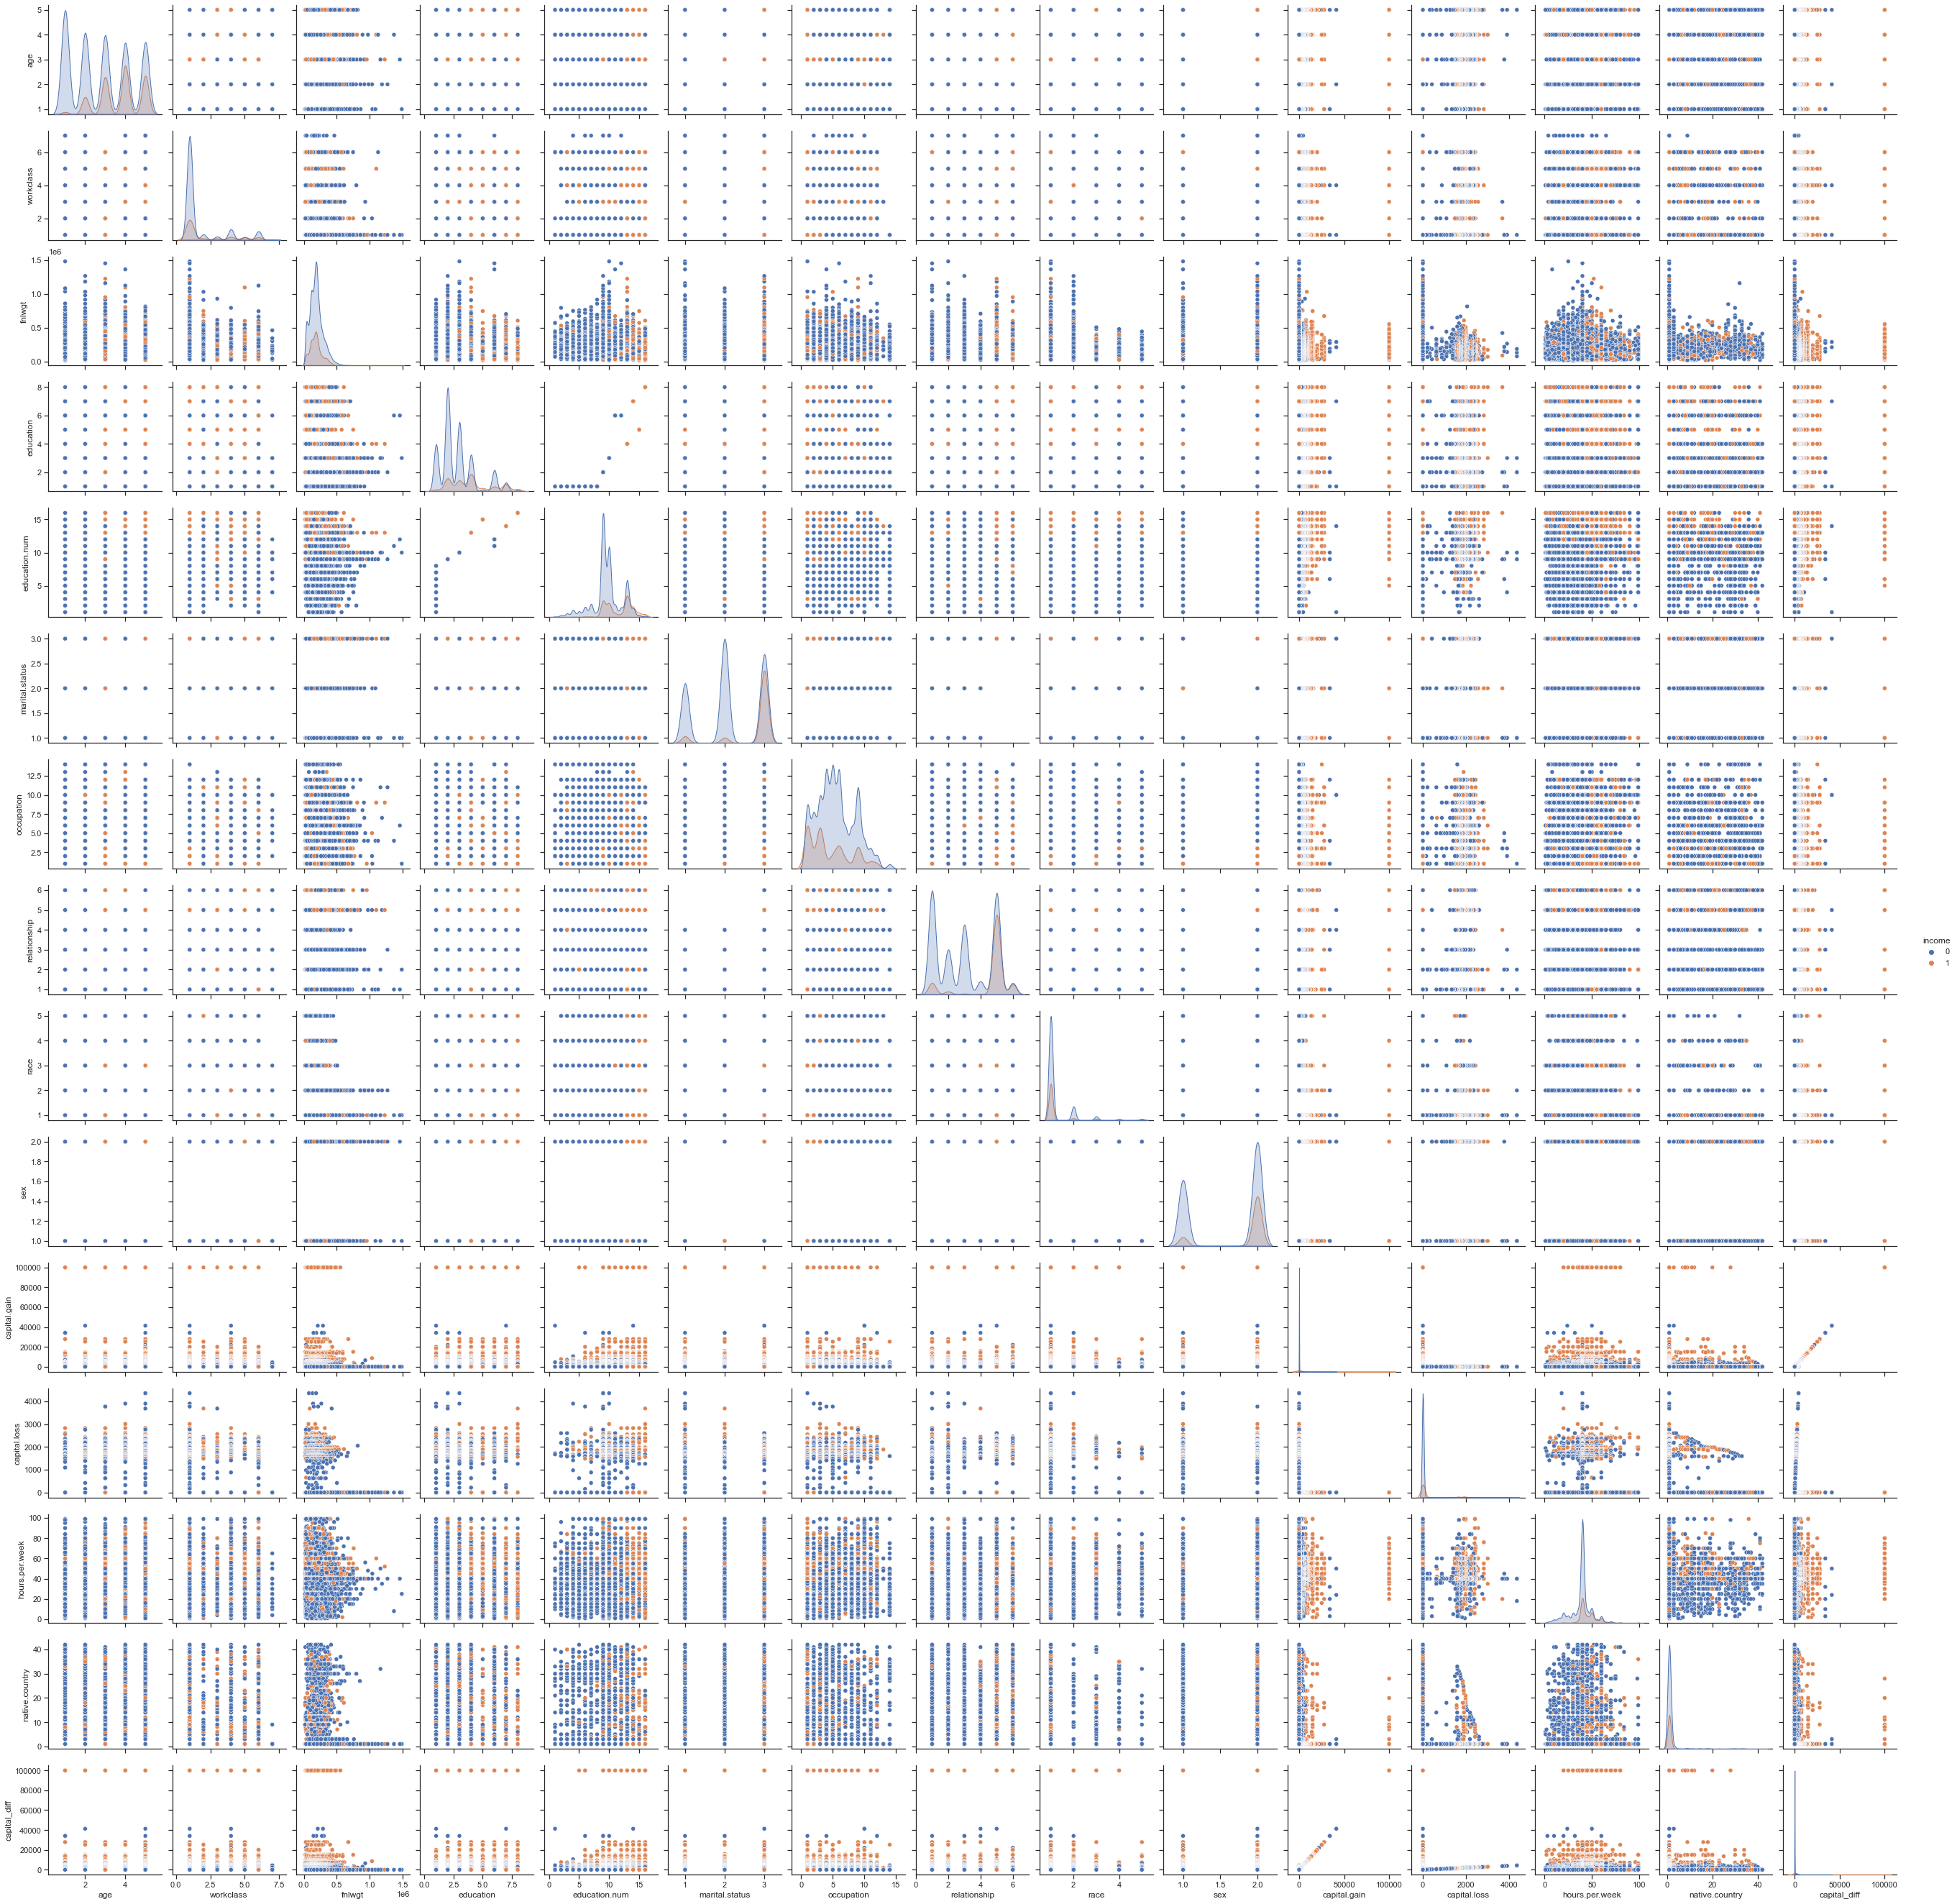

In [400]:
sns.pairplot(dataset, hue="income")

plt.show()

In [401]:
dataset.describe()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,capital_diff
count,32561.000000,30725.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,30718.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,31978.000000,32561.000000,32561.000000
mean,3.036977,1.842832,1.897784e+05,3.116827,10.080679,2.275053,5.281659,3.369000,1.222935,1.669205,1077.648844,87.303830,40.437456,2.284070,0.240810,1164.952673
std,1.405276,1.584306,1.055500e+05,1.705080,2.572720,0.772187,3.042884,1.753353,0.633734,0.470506,7385.292085,402.960219,12.347429,5.322914,0.427581,7383.545530
min,1.000000,1.000000,1.228500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,2.000000,1.000000,1.178270e+05,2.000000,9.000000,2.000000,3.000000,1.000000,1.000000,1.000000,0.000000,0.000000,40.000000,1.000000,0.000000,0.000000
50%,3.000000,1.000000,1.783560e+05,3.000000,10.000000,2.000000,5.000000,3.000000,1.000000,2.000000,0.000000,0.000000,40.000000,1.000000,0.000000,0.000000
75%,4.000000,2.000000,2.370510e+05,4.000000,12.000000,3.000000,8.000000,5.000000,1.000000,2.000000,0.000000,0.000000,45.000000,1.000000,0.000000,0.000000
max,5.000000,7.000000,1.484705e+06,8.000000,16.000000,3.000000,14.000000,6.000000,5.000000,2.000000,99999.000000,4356.000000,99.000000,42.000000,1.000000,99999.000000


Count tell us if there's a missing data or not. All the numerical columns seems to have no missing data here. The mean and median tell us about the skewness in the data. For capital gain and capital loss, we can see that mean > median which happens when our data is right skewed. Rest of the columns seems fine. We can also say that our capital gain and capital loss are affected by outliers

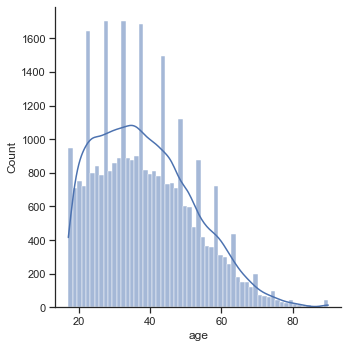

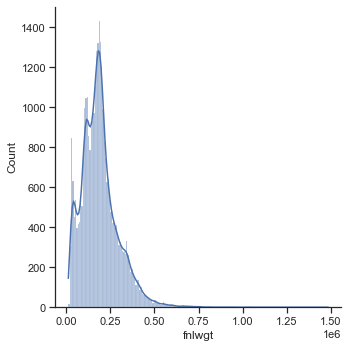

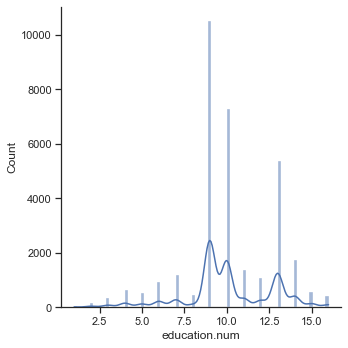

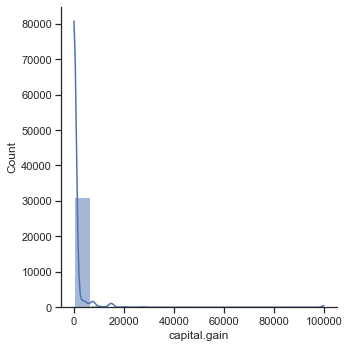

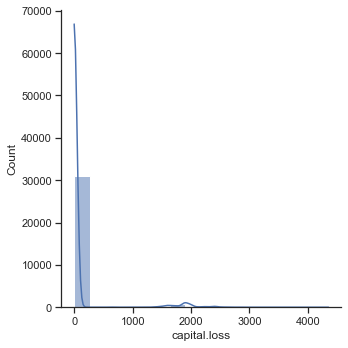

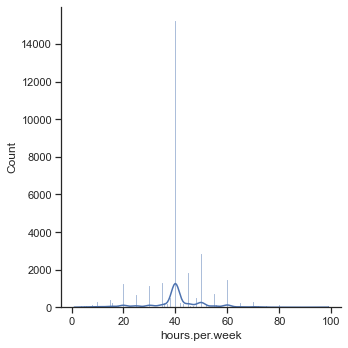

In [385]:
sns.displot(x=dataset['age'], kde=True)
sns.displot(x=dataset['fnlwgt'], kde=True)
sns.displot(x=dataset['education.num'], kde=True)
sns.displot(x=dataset['capital.gain'], kde=True)
sns.displot(x=dataset['capital.loss'], kde=True)
sns.displot(x=dataset['hours.per.week'], kde=True)

# Based on our visualization in previous snippet we will accoplish the following preprocessing to make our feature more informative
## group ages in different bins so each bin have enought number of samples 


## seperate categorical and numerical variables

In [386]:
numerical_var = [col for col in dataset.columns if dataset[col].dtype != object]
categorical_var = [col for col in dataset.columns if dataset[col].dtype == object]
# [(i, dataset[i].unique()) for i in categorical_var]

## encoding income
* 0 = income < \$50k
* 1 = income > $50k

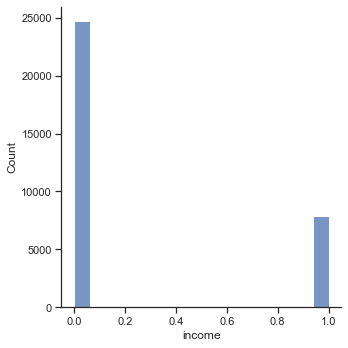

In [387]:
dataset['income'] = dataset['income'].apply(lambda x: x.replace("<=50K", '0'))
dataset['income'] = dataset['income'].apply(lambda x: x.replace(">50K", '1'))
dataset['income'] = dataset['income'].replace('0', 0)
dataset['income'] = dataset['income'].replace('1', 1)
sns.displot(dataset['income'])

<AxesSubplot:xlabel='workclass', ylabel='income'>

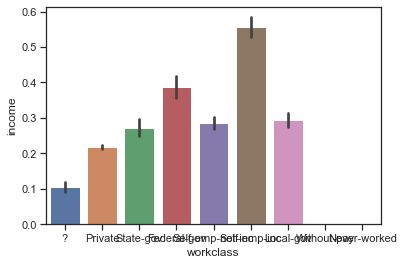

In [346]:
sns.barplot(x=dataset['workclass'], y=dataset['income'], data=dataset)

# plt.xticks(rotation = 90)

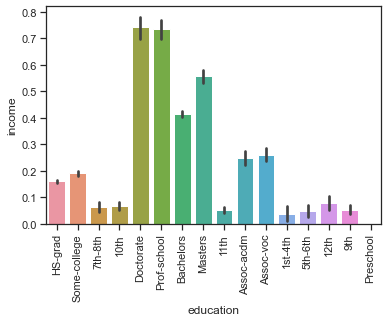

In [155]:
sns.barplot(x = dataset['education'], y = dataset['income'])
plt.xticks(rotation = 90);

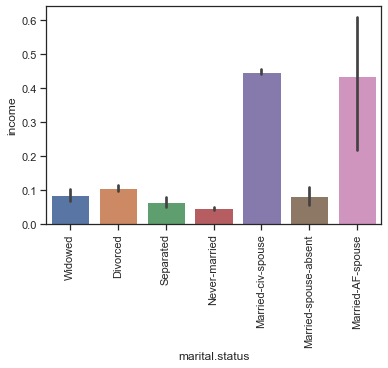

In [156]:
sns.barplot(x = 'marital.status', y = 'income', data = dataset)
plt.xticks(rotation = 90);

In [388]:
# age
for i in dataset:
    dataset.loc[(dataset['age'] > 16) & (dataset['age'] <= 25), 'age'] = 1
    dataset.loc[(dataset['age'] > 25) & (dataset['age'] <= 32), 'age'] = 2
    dataset.loc[(dataset['age'] > 32) & (dataset['age'] <= 40), 'age'] = 3
    dataset.loc[(dataset['age'] > 40) & (dataset['age'] <= 50), 'age'] = 4
    dataset.loc[dataset['age'] > 50, 'age'] = 5

# education
dataset['education'] = dataset['education'].apply(lambda x: 'School' if x == '11th' or x == '7th-8th' or x == '10th' 
                                              or x == '5th-6th' or x == '9th' or x == '12th' or x == '1st-4th' 
                                              or x == 'Preschool' else x)
dataset['education'] = dataset['education'].apply(lambda x: 'Associate' if x == 'Assoc-acdm' or x == 'Assoc-voc' else x)
education_map = {'School':1,
             'HS-grad':2,
             'Some-college':3,
             'Bachelors':4,
             'Prof-school':5,
             'Associate':6,
             'Masters':7,
             'Doctorate':8}
dataset['education'] = dataset['education'].map(education_map)

dataset['capital_diff'] = abs((dataset['capital.gain'] - dataset['capital.loss']))

dataset['marital.status'] = dataset['marital.status'].apply(lambda x: 'Prev-Married' if (x == 'Widowed' or x == 'Divorced' or x == 'Separated') else x)
dataset['marital.status'] = dataset['marital.status'].apply(lambda x: 'Married' if (x == 'Married-civ-spouse' or x == 'Married-spouse-absent' or x == 'Married-AF-spouse') else x)

# workclass
dataset['workclass'] = dataset['workclass'].apply(lambda x: 'No income' if x == 'Never-worked' or x == 'Without-pay'
                                            else x)

dataset[dataset == '?'] = np.nan

col_with_symbol = ['workclass', 'occupation', 'native.country']



# Cold-Deck Imputation

In [394]:
keys = dataset['workclass'].unique()
values = np.array([np.nan, 1, 2, 3, 4, 5, 6, 7])
map_data = dict(zip(keys, values))
dataset['workclass'] = dataset['workclass'].map(map_data)

keys = dataset['occupation'].unique()
values = np.array([np.nan, 1, 2, 3, 4, 5, 6,7, 8, 9,10, 11, 12,13, 14])
map_values = dict(zip(keys, values))
dataset['occupation'] = dataset['occupation'].map(map_values)


keys = dataset['native.country'].unique()
values = np.array(np.linspace(start=1, stop=len(keys), num=len(keys)))
values[1] = np.nan
map_values = dict(zip(keys, values))
dataset['native.country'] = dataset['native.country'].map(map_values)

keys = dataset['sex'].unique()
values = np.array(np.linspace(start=1, stop=len(keys), num=len(keys)))
map_values = dict(zip(keys, values))
dataset['sex'] = dataset['sex'].map(map_values)

keys = dataset['relationship'].unique()
values = np.array(np.linspace(start=1, stop=len(keys), num=len(keys)))
map_values = dict(zip(keys, values))
dataset['relationship'] = dataset['relationship'].map(map_values)

keys = dataset['marital.status'].unique()
values = np.array(np.linspace(start=1, stop=len(keys), num=len(keys)))
map_values = dict(zip(keys, values))
dataset['marital.status'] = dataset['marital.status'].map(map_values)

keys = dataset['race'].unique()
values = np.array(np.linspace(start=1, stop=len(keys), num=len(keys)))
map_values = dict(zip(keys, values))
dataset['race'] = dataset['race'].map(map_values)


def cosinSim(vec1, vec2):
    vec1_norm = np.linalg.norm(vec1)
    vec2_norm = np.linalg.norm(vec2)
    cosin_sim = np.dot(vec1, vec2)/(vec1_norm *vec2_norm)
    return cosin_sim

def coldImputationE1(data):
    columns = ['age', 'fnlwgt', 'education', 'education.num',  
               'hours.per.week', 'hours.per.week', 'capital_diff']
    datanonullINDEX = data[data['workclass'].notnull()].index 
    datanullINDEX = dataset[dataset['workclass'].isnull()].index
    datanonull = data[data['workclass'].notnull()][columns]
    for i in datanullINDEX:
        vec1 = data.iloc[int(i)][columns].values
        candidate = {'replaceID': 0}
        temp = 0.
        for j in datanonullINDEX:
            vec2 = data.iloc[int(j)][columns].values
            v1_sim_v2 = 1
            if v1_sim_v2 > temp:
                temp = v1_sim_v2
                candidate['replaceID']= int(j)

        data.iloc[int(i)]['workclass'] = data.iloc[candidate['replaceID']]['workclass']
    
    return data
            
         
def coldImputationE2(data):   
    imputer = KNNImputer(n_neighbors=2, weights='uniform')
    datanew = imputer.fit_transform(data)
    return datanew

def meanImpute(data):
    impute = SimpleImputer(missing_values=np.nan, strategy='mean')
    newdata = impute.fit_transform(data)
    return newdata
    
def regressionImpute(data):
    imp = IterativeImputer(max_iter=10, random_state=0)
    datanew = imp.fit_transform(data)
    return datanew



Y = dataset['income']
X = dataset.drop(['income'], axis=1)
X_coldImpute = coldImputationE2(X)
X_meanImpute = meanImpute(X)
X_regressionImpute = regressionImpute(X)


In [393]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

# naive bayes coldImpute
X_train, X_test, y_train, y_test = train_test_split(X_coldImpute, Y, test_size=0.2, random_state=0)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print(f"Number of mislabeled points out of a total {X_test.shape[0]} points : {(y_test != y_pred).sum()}")
# print(gnb.predict(X_test))
print(f'score of naive bayes algorithm on cold deck imputed data: {gnb.score(X_test, y_test)}')

# naive bayes mean impute
X_train, X_test, y_train, y_test = train_test_split(X_meanImpute, Y, test_size=0.2, random_state=0)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print(f"Number of mislabeled points out of a total {X_test.shape[0]} points : {(y_test != y_pred).sum()}")
# print(gnb.predict(X_test))
print(f'score of naive bayes algorithm on mean imputed data: {gnb.score(X_test, y_test)}')

# naive bayes regressImpute
X_train, X_test, y_train, y_test = train_test_split(X_regressionImpute, Y, test_size=0.2, random_state=0)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print(f"Number of mislabeled points out of a total {X_test.shape[0]} points : {(y_test != y_pred).sum()}")
# print(gnb.predict(X_test))
print(f'score of naive bayes algorithm on regression imputed data: {gnb.score(X_test, y_test)}')


Number of mislabeled points out of a total 6513 points : 1323
score of naive bayes algorithm on cold deck imputed data: 0.7968678028558268
Number of mislabeled points out of a total 6513 points : 1323
score of naive bayes algorithm on mean imputed data: 0.7968678028558268
Number of mislabeled points out of a total 6513 points : 1323
score of naive bayes algorithm on regression imputed data: 0.7968678028558268


# DECISION TREE

In [396]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier


# COLD DECK IMPUTED
X_train, X_test, y_train, y_test = train_test_split(X_coldImpute, Y, test_size=0.2, random_state=0)
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print(f"decision tree (cold deck imputed) accuracy = {score}")

# Mean IMPUTED
X_train, X_test, y_train, y_test = train_test_split(X_meanImpute, Y, test_size=0.2, random_state=0)
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print(f"decision tree (mean imputed) accuracy = {score}")

# COLD DECK IMPUTED
X_train, X_test, y_train, y_test = train_test_split(X_regressionImpute, Y, test_size=0.2, random_state=0)
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print(f"decision tree (regress imputed) accuracy = {score}")

decision tree (cold deck imputed) accuracy = 0.8134500230308613
decision tree (mean imputed) accuracy = 0.815599570090588
decision tree (regress imputed) accuracy = 0.8106863196683556


# Random Forest

In [399]:
from sklearn.ensemble import RandomForestClassifier

# COLD DECK IMPUTED
X_train, X_test, y_train, y_test = train_test_split(X_coldImpute, Y, test_size=0.2, random_state=0)
clf = RandomForestClassifier(n_estimators=10, max_depth=3, random_state=0)
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print(f"Random Forest (cold deck imputed) accuracy = {score}")

# Mean IMPUTED
X_train, X_test, y_train, y_test = train_test_split(X_meanImpute, Y, test_size=0.2, random_state=0)
clf = RandomForestClassifier(n_estimators=10, max_depth=3, random_state=0)
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print(f"Random Forest (mean imputed) accuracy = {score}")

# COLD DECK IMPUTED
X_train, X_test, y_train, y_test = train_test_split(X_regressionImpute, Y, test_size=0.2, random_state=0)
clf = RandomForestClassifier(n_estimators=10, max_depth=3, random_state=0)
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print(f"Random Forest (regress imputed) accuracy = {score}")

Random Forest (cold deck imputed) accuracy = 0.8478427759864886
Random Forest (mean imputed) accuracy = 0.8478427759864886
Random Forest (regress imputed) accuracy = 0.8476892369107938
